## Проект по теме "Прогнозирование наличия сердечно-сосудистых заболеваний на основе характеристик пациентов"

Датасет представляет собой .csv файл, содержащий следующие поля:

* id: идентификатор для каждого человека в наборе данных;
* age: возраст человека (в днях);
* gender: пол (1 для женщин, 2 для мужчин);
* height: рост в сантиметрах;
* weight: вес в килограммах;
* ap_hi: систолическое артериальное давление (измеряется в мм рт.ст.);
* ap_lo: диастолическое артериальное давление (измеряется в мм рт.ст.);
* cholesterol: уровень холестерина (1 – в норме, 2 – выше нормы, 3 –
значительно выше нормы);
* gluc: уровень глюкозы (1 – в норме, 2 – выше нормы, 3 – значительно выше
нормы);
* smoke: курит ли человек (0 – нет, 1 – да);
* alco: употребляет ли человек алкоголь (0 – нет, 1 – да);
* active: является ли человек физически активным (0 – нет, 1 – да);
* cardio: наличие сердечно-сосудистых заболеваний (0 – нет, 1 – да).

Задачей является построить модель, предсказывающую наличие сердечно-сосудистых заболеваний.
Вам необходимо реализовать все дальнейшие шаги, обучить модель и оценить её качество.

## Задание 1: загрузка файла и проверка пропущенных значений (5 баллов)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

# Suppress warnings for cleaner output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('data/cvd.xls - cvd.xls.csv')
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Откройте данные и изучите их: есть ли пропущенные значения? Прокомментируйте результат. Если пропущенные значения есть - удалите строки с ними.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
# Display the column names in the dataset
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [5]:
df.isna()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,False,False,False,False
69996,False,False,False,False,False,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,False,False,False,False,False
69998,False,False,False,False,False,False,False,False,False,False,False,False,False


Мы видим отсутствие пропущенных значений

In [6]:
categoric_cols = ['gender','cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

In [7]:
for i in categoric_cols:
    if i in df.columns:
        print('All values in column {0} : \n{1}'.format(i, df[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

# Print the list of categorical columns
print('Categorical columns:', categoric_cols)

All values in column gender : 
gender
1    45530
2    24470
Name: count, dtype: int64


All values in column cholesterol : 
cholesterol
1    52385
2     9549
3     8066
Name: count, dtype: int64


All values in column gluc : 
gluc
1    59479
2     5190
3     5331
Name: count, dtype: int64


All values in column smoke : 
smoke
0    63831
1     6169
Name: count, dtype: int64


All values in column alco : 
alco
0    66236
1     3764
Name: count, dtype: int64


All values in column active : 
active
0    13739
1    56261
Name: count, dtype: int64


All values in column cardio : 
cardio
0    35021
1    34979
Name: count, dtype: int64


Categorical columns: ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']


In [8]:
df['gender'].value_counts() / df.shape[0] * 100

gender
1    65.042857
2    34.957143
Name: count, dtype: float64

In [9]:
df['cholesterol'].value_counts() / df.shape[0] * 100

cholesterol
1    74.835714
2    13.641429
3    11.522857
Name: count, dtype: float64

## Задание 2: проверка данных на мультиколлинеарность (15 баллов)

**2.1** Данные обязательно необходимо проверить на мультиколлинеарность: линейную взаимосвязь между признаками. Сначала проверим наличие чистой мультиколлинеарности. Для того, чтобы её идентифицировать - для начала посчитайте ранг для матрицы корреляций и ее определитель. Какой вывод можно сделать?

In [10]:
# Построение корреляционной матрицы
corr_matrix = df.corr()

# Вычисление собственных значений корреляционной матрицы
eigenvalues = np.linalg.eigvals(corr_matrix)

# Определение ранга матрицы (по количеству ненулевых собственных значений)
# Здесь выбираем собственные значения, больше порога (например, 1e-10)
rank = np.sum(eigenvalues > 1e-10)

print(f'Ранг матрицы корреляций: {rank}')

Ранг матрицы корреляций: 13


Pearson Correlation,


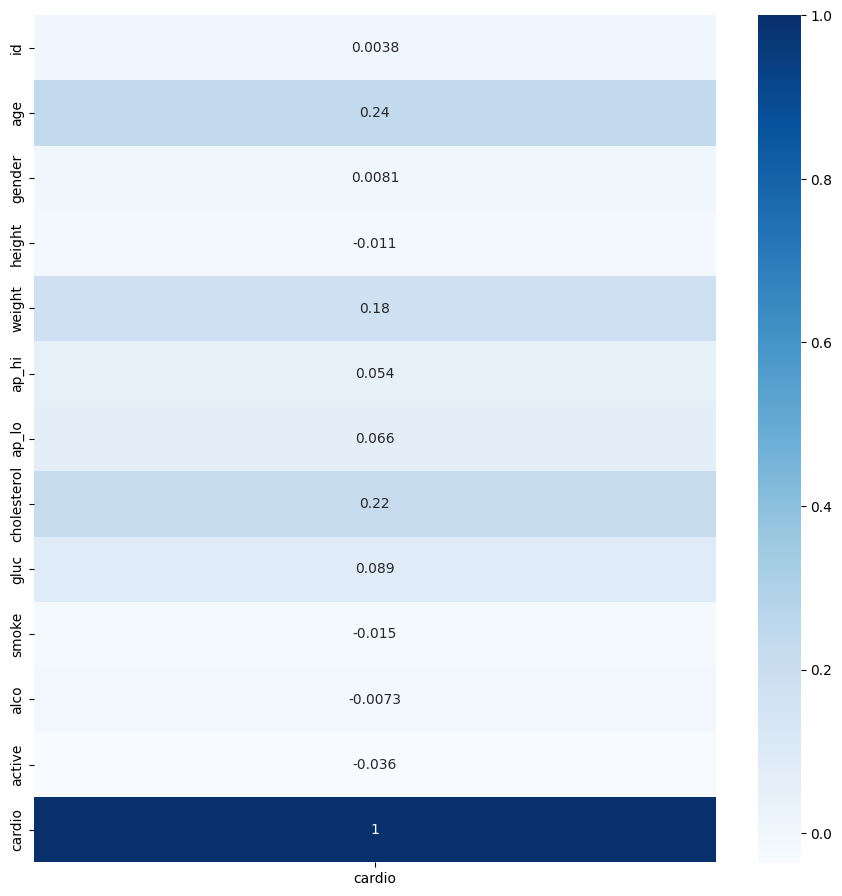

abs corr score: 
id             0.003799
age            0.238159
gender         0.008109
height         0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke          0.015486
alco           0.007330
active         0.035653
Name: cardio, dtype: float64


mean 0.07763883795706497


feature selection result: 
age            0.238159
weight         0.181660
cholesterol    0.221147
gluc           0.089307
Name: cardio, dtype: float64


In [11]:
print('Pearson Correlation,')
plt.figure(figsize = (11,11))
cor = df.corr().iloc[:,-1:]
sns.heatmap(cor, annot = True, cmap = plt.cm.Blues)
plt.show()

print('abs corr score: ')
print(abs(cor['cardio'][0:-1]))
cor['output'] = cor['cardio'][0:-1]
margin = abs(cor['cardio'][0:-1]).mean()

print('\n')

print('mean {0}'.format(margin))

print('\n')

print('feature selection result: ')
fs = abs(cor['cardio'][0:-1])[abs(cor['cardio']) > margin]
print(fs)

высококоррелированных признаков нет

## Задание 3. Стандартизация (15 баллов)

Разделите данные на два массива: в переменную **Х** запишите массив признаков, а в переменную **y** - целевую переменную (cardio). Стандартизируйте массив признаков без использования готовых функций для стандартизации.

In [12]:
# Разделение на массив признаков X и целевую переменную y
X = df.drop(columns=['cardio']).values  # Все столбцы, кроме 'cardio'
y = df['cardio'].values  # Целевая переменная

In [13]:
from numpy import mean

In [14]:
mean1 = mean(df['age'], axis=0)
std_dev1 = np.std(df['age'], axis=0)
X_standardized1 = (df['age'] - mean1) / std_dev1

print("Стандартизированный массив признаков:")
print(X_standardized1)

Стандартизированный массив признаков:
0       -0.436062
1        0.307686
2       -0.247997
3       -0.748152
4       -0.808543
           ...   
69995   -0.092762
69996    1.269492
69997   -0.163286
69998    1.200589
69999    0.434144
Name: age, Length: 70000, dtype: float64


In [15]:
mean2 = mean(df['height'], axis=0)
std_dev2 = np.std(df['height'], axis=0)
X_standardized2 = (df['height'] - mean2) / std_dev2

print("Стандартизированный массив признаков:")
print(X_standardized2)

Стандартизированный массив признаков:
0        0.443452
1       -1.018168
2        0.078047
3        0.565254
4       -1.018168
           ...   
69995    0.443452
69996   -0.774565
69997    2.270477
69998   -0.165556
69999    0.687055
Name: height, Length: 70000, dtype: float64


In [16]:
mean3 = mean(df['weight'], axis=0)
std_dev3 = np.std(df['weight'], axis=0)
X_standardized3 = (df['weight'] - mean3) / std_dev3

print("Стандартизированный массив признаков:")
print(X_standardized3)

Стандартизированный массив признаков:
0       -0.847873
1        0.749831
2       -0.708942
3        0.541435
4       -1.264666
           ...   
69995    0.124642
69996    3.597913
69997    2.139139
69998   -0.153219
69999   -0.153219
Name: weight, Length: 70000, dtype: float64


In [17]:
mean4 = mean(df['ap_hi'], axis=0)
std_dev4 = np.std(df['ap_hi'], axis=0)
X_standardized4 = (df['ap_hi'] - mean4) / std_dev4

print("Стандартизированный массив признаков:")
print(X_standardized4)


Стандартизированный массив признаков:
0       -0.122182
1        0.072610
2        0.007679
3        0.137541
4       -0.187113
           ...   
69995   -0.057251
69996    0.072610
69997    0.332333
69998    0.040145
69999   -0.057251
Name: ap_hi, Length: 70000, dtype: float64


In [18]:
mean5 = mean(df['ap_lo'], axis=0)
std_dev5 = np.std(df['ap_lo'], axis=0)
X_standardized5 = (df['ap_lo'] - mean5) / std_dev5

print("Стандартизированный массив признаков:")
print(X_standardized5)


Стандартизированный массив признаков:
0       -0.088238
1       -0.035180
2       -0.141297
3        0.017879
4       -0.194356
           ...   
69995   -0.088238
69996   -0.035180
69997   -0.035180
69998   -0.088238
69999   -0.088238
Name: ap_lo, Length: 70000, dtype: float64


In [19]:
mean6 = mean(df['cholesterol'], axis=0)
std_dev6 = np.std(df['cholesterol'], axis=0)
X_standardized6 = (df['cholesterol'] - mean6) / std_dev6

print("Стандартизированный массив признаков:")
print(X_standardized6)

Стандартизированный массив признаков:
0       -0.539322
1        2.400793
2        2.400793
3       -0.539322
4       -0.539322
           ...   
69995   -0.539322
69996    0.930735
69997    2.400793
69998   -0.539322
69999    0.930735
Name: cholesterol, Length: 70000, dtype: float64


In [20]:
mean7 = mean(df['gluc'], axis=0)
std_dev7 = np.std(df['gluc'], axis=0)
X_standardized7 = (df['gluc'] - mean7) / std_dev7

print("Стандартизированный массив признаков:")
print(X_standardized7)

Стандартизированный массив признаков:
0       -0.395720
1       -0.395720
2       -0.395720
3       -0.395720
4       -0.395720
           ...   
69995   -0.395720
69996    1.351719
69997   -0.395720
69998    1.351719
69999   -0.395720
Name: gluc, Length: 70000, dtype: float64


In [21]:
mean8 = mean(df['smoke'], axis=0)
std_dev8 = np.std(df['smoke'], axis=0)
X_standardized8 = (df['smoke'] - mean8) / std_dev8

print("Стандартизированный массив признаков:")
print(X_standardized8)

Стандартизированный массив признаков:
0       -0.310879
1       -0.310879
2       -0.310879
3       -0.310879
4       -0.310879
           ...   
69995    3.216684
69996   -0.310879
69997   -0.310879
69998   -0.310879
69999   -0.310879
Name: smoke, Length: 70000, dtype: float64


In [22]:
mean9 = mean(df['alco'], axis=0)
std_dev9 = np.std(df['alco'], axis=0)
X_standardized9 = (df['alco'] - mean9) / std_dev9

print("Стандартизированный массив признаков:")
print(X_standardized9)

Стандартизированный массив признаков:
0       -0.238384
1       -0.238384
2       -0.238384
3       -0.238384
4       -0.238384
           ...   
69995   -0.238384
69996   -0.238384
69997    4.194906
69998   -0.238384
69999   -0.238384
Name: alco, Length: 70000, dtype: float64


In [23]:
mean10 = mean(df['active'], axis=0)
std_dev10 = np.std(df['active'], axis=0)
X_standardized10 = (df['active'] - mean10) / std_dev10

print("Стандартизированный массив признаков:")
print(X_standardized10)

Стандартизированный массив признаков:
0        0.494167
1        0.494167
2       -2.023607
3        0.494167
4       -2.023607
           ...   
69995    0.494167
69996    0.494167
69997   -2.023607
69998   -2.023607
69999    0.494167
Name: active, Length: 70000, dtype: float64


Вычислите длину всех векторов - признаков. Прокомментируйте результат.

In [24]:
# Вычисление длины всех векторов (L2-норма по строкам)
# np.linalg.norm рассчитывает норму вектора, используем ось 1 для строк (для объектов)
vector_lengths = np.linalg.norm(X, axis=1)

# Вывод длины всех векторов
print("Длина каждого вектора признаков (L2-норма):")
print(vector_lengths)

Длина каждого вектора признаков (L2-норма):
[ 18394.37479231  20229.46509426  18858.40886713 ... 101797.82611137
 102483.19934994 102086.95554281]


Исходя из представленных значений длины (L2-нормы) векторов признаков, можно сделать несколько выводов:

Значительная вариативность длины векторов: Диапазон значений норм варьируется от около 18,394 до более чем 102,000. Это говорит о том, что разные объекты (строки) сильно отличаются по величине признаков. Векторы с большими длинами содержат признаки с большими значениями, что может указывать на различные масштабы признаков.

Неоднородные масштабы признаков: Разброс в длинах может быть признаком того, что признаки имеют разные масштабы. Например, один признак может измеряться в тысячах, а другой — в долях единицы. Это свидетельствует о необходимости стандартизации (нормализации) данных, чтобы сбалансировать влияние всех признаков и избежать доминирования одного признака над другим.

Нужно проверить корреляцию признаков: Векторы с большими нормами могут иметь высокие корреляции между признаками или признаки с более крупными значениями. Это важно учитывать при анализе взаимосвязей между переменными.

Важность стандартизации: Перед использованием алгоритмов машинного обучения (особенно чувствительных к масштабу данных, таких как линейная регрессия, SVM или метод k-ближайших соседей), важно стандартизировать данные. После стандартизации длины векторов будут ближе друг к другу, что улучшит работу этих моделей.

Рекомендации:
Провести стандартизацию или нормализацию данных. Это устранит эффект различных масштабов признаков и сделает данные более сопоставимыми.
Дополнительно стоит исследовать разброс признаков и провести анализ корреляций, чтобы выявить, какие признаки могут иметь наибольшее влияние на результат.

## Задание 4. Решение задачи классификации. (20 баллов)

**4.1** Теперь приступим непосредственно к решению задачи классификации. Обучите наивный байесовский классификатор. Предварительно выберите один из его видов: поясните свой выбор.

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

**4.2** Оцените полученное качество и проинтерпретируйте полученный результат. Не забудьте разделить выборку на обучающую и тестовую части.

In [27]:
# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение наивного байесовского классификатора
model = GaussianNB()
model.fit(X_train, y_train)

# Предсказание результатов на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность модели: {accuracy:.2f}')

# Вывод подробного отчета по метрикам классификации
print(classification_report(y_test, y_pred))

Точность модели: 0.58
              precision    recall  f1-score   support

           0       0.55      0.92      0.69     10461
           1       0.75      0.24      0.36     10539

    accuracy                           0.58     21000
   macro avg       0.65      0.58      0.52     21000
weighted avg       0.65      0.58      0.52     21000



Пояснение:
Разделение данных на тренировочный и тестовый наборы: Мы разделяем данные на 70% для обучения и 30% для тестирования с помощью train_test_split.
Обучение наивного байесовского классификатора: Используем GaussianNB для обучения модели.
Оценка качества модели:
Вычисляется точность (accuracy).
Выводится полный отчет по метрикам, включая precision, recall и F1-score для более детального анализа.
Комментарии к выбору модели:
Мы выбрали GaussianNB из-за того, что этот вид наивного байесовского классификатора подходит для данных с непрерывными признаками. 

Если признаки окажутся дискретными (например, количество встречающихся слов или бинарные признаки), можно рассмотреть другие типы, такие как MultinomialNB или BernoulliNB.

## Задание 5: Решающее дерево (25 баллов)

Теперь решите задачу классификации с помощью обучающего дерева.

**5.1** Обучите дерево, не задавая никакие гиперпараметры. Выведите получившиеся гиперпараметры. Какое получилось качество? Сравните результат с предыдущей моделью.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение дерева решений без задания гиперпараметров
model_tree = DecisionTreeClassifier()
model_tree.fit(X_train, y_train)

# Вывод гиперпараметров дерева решений
print("Гиперпараметры дерева решений:")
print(model_tree.get_params())

# Предсказание результатов на тестовом наборе
y_pred_tree = model_tree.predict(X_test)

# Оценка качества модели
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f'Точность дерева решений: {accuracy_tree:.2f}')

# Вывод подробного отчета по метрикам классификации
print(classification_report(y_test, y_pred_tree))

Гиперпараметры дерева решений:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Точность дерева решений: 0.64
              precision    recall  f1-score   support

           0       0.63      0.63      0.63     10461
           1       0.64      0.64      0.64     10539

    accuracy                           0.64     21000
   macro avg       0.63      0.63      0.63     21000
weighted avg       0.64      0.64      0.64     21000



In [30]:
# Деревья решений могут показывать более высокую точность по сравнению с наивными байесовскими классификаторами, 
# особенно если данные содержат сложные зависимости между признаками.

**5.2** Подберите оптимальные гиперпараметры с помощью перебора по сетке. Обучите дерево с оптимальными гиперпараметрами. Изменилось ли качество?

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Определение сетки гиперпараметров для поиска
param_grid = {
    'criterion': ['gini', 'entropy'],  # Критерий разбиения
    'splitter': ['best', 'random'],    # Способ разбиения
    'max_depth': [None, 10, 20, 30, 40],  # Глубина дерева
    'min_samples_split': [2, 5, 10],   # Минимальное количество образцов для разбиения
    'min_samples_leaf': [1, 2, 4],     # Минимальное количество образцов на лист
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print(f"Лучшие гиперпараметры: {grid_search.best_params_}")

# Обучение дерева с оптимальными гиперпараметрами
best_tree = grid_search.best_estimator_

# Предсказание результатов на тестовом наборе
y_pred_best_tree = best_tree.predict(X_test)

# Оценка качества модели
accuracy_best_tree = accuracy_score(y_test, y_pred_best_tree)
print(f'Точность дерева решений с оптимальными гиперпараметрами: {accuracy_best_tree:.2f}')

# Вывод подробного отчета по метрикам классификации
print(classification_report(y_test, y_pred_best_tree))

Fitting 5 folds for each of 180 candidates, totalling 900 fits
Лучшие гиперпараметры: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Точность дерева решений с оптимальными гиперпараметрами: 0.73
              precision    recall  f1-score   support

           0       0.72      0.74      0.73     10461
           1       0.73      0.72      0.73     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000



In [32]:
# Видно увеличение качества модели с использованием гиперпараметров.

**5.3** Выведите важность признаков. Какие три признака самые важные? Прокомментируйте результат.

Три самых важных признака:
       Признак  Важность
5        ap_hi  0.618644
1          age  0.155595
7  cholesterol  0.065989


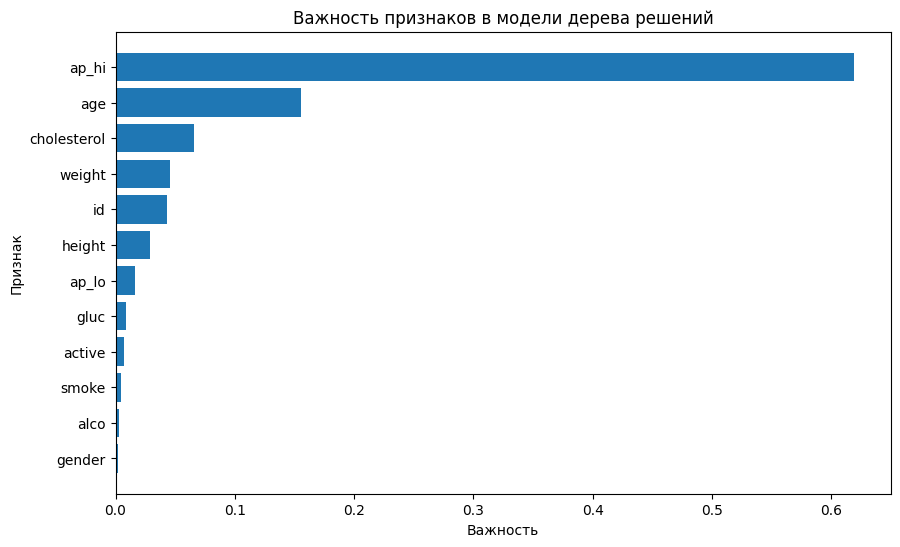

In [33]:
import matplotlib.pyplot as plt

# Получение важности признаков из обученной модели
feature_importances = best_tree.feature_importances_

# Отображение важности признаков
# Получаем названия признаков из исходного набора данных
feature_names = df.drop(columns=['cardio']).columns

# Создаем DataFrame для удобного отображения
feature_importances_df = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importances
})

# Сортируем признаки по важности
feature_importances_df = feature_importances_df.sort_values(by='Важность', ascending=False)

# Вывод 3 самых важных признаков
print("Три самых важных признака:")
print(feature_importances_df.head(3))

# Шаг 4: Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Признак'], feature_importances_df['Важность'])
plt.title('Важность признаков в модели дерева решений')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.gca().invert_yaxis()  # Для отображения важнейших признаков сверху
plt.show()

In [34]:
# Важность признака указывает, сколько раз он использовался для разбиения узлов дерева и насколько это разбиение улучшало классификацию. Признаки с более высокой важностью 
# чаще используются для разбиения и более значимы для модели.

## Задание 6: Случайный лес и градиентный бустинг (20 баллов)

Осталось применить ансамблевые методы!

**6.1** Используйте случайный лес: без настройки и с подробом гиперпараметров по сетке. Какое качество получается в ситуации оптимальных гиперпараметров? Какие признаки самые важные? Сравнение результат с простым решающим деревом.

Точность случайного леса (по умолчанию): 0.73
              precision    recall  f1-score   support

           0       0.71      0.75      0.73     10461
           1       0.74      0.70      0.72     10539

    accuracy                           0.73     21000
   macro avg       0.73      0.73      0.73     21000
weighted avg       0.73      0.73      0.73     21000

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Лучшие гиперпараметры случайного леса: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Точность случайного леса (с оптимальными гиперпараметрами): 0.74
              precision    recall  f1-score   support

           0       0.72      0.79      0.75     10461
           1       0.77      0.69      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000

Три самых важных признака в

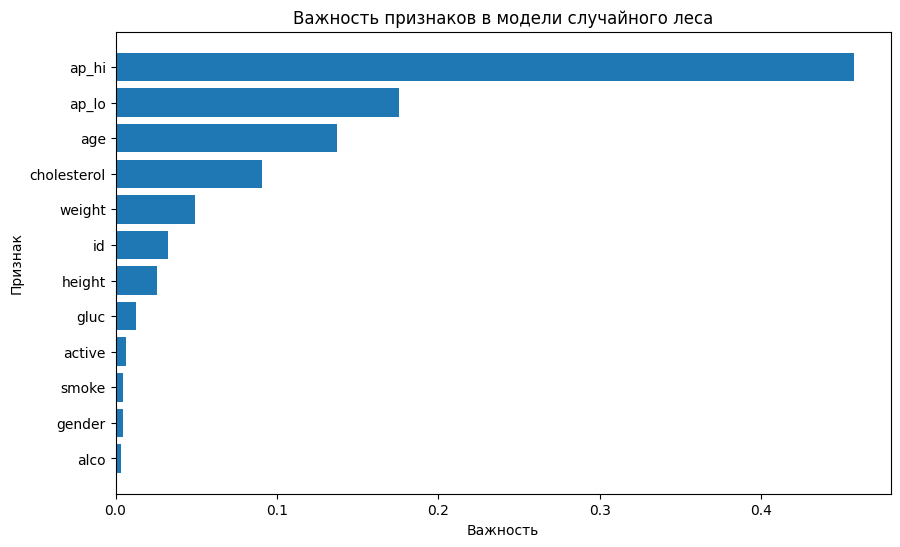

Точность дерева решений: 0.73
Точность случайного леса с оптимальными гиперпараметрами: 0.74


In [35]:
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----- Часть 1: Обучение случайного леса без настройки гиперпараметров -----

# Обучение случайного леса с параметрами по умолчанию
rf_default = RandomForestClassifier(random_state=42)
rf_default.fit(X_train, y_train)

# Предсказание и оценка качества
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f'Точность случайного леса (по умолчанию): {accuracy_default:.2f}')
print(classification_report(y_test, y_pred_default))

# ----- Часть 2: Подбор гиперпараметров с помощью GridSearchCV -----

# Определение сетки гиперпараметров для поиска
param_grid = {
    'n_estimators': [50, 100, 200],        # Количество деревьев в лесу
    'max_depth': [None, 10, 20, 30],       # Глубина каждого дерева
    'min_samples_split': [2, 5, 10],       # Минимальное количество образцов для разбиения узла
    'min_samples_leaf': [1, 2, 4],         # Минимальное количество образцов в листе
    'bootstrap': [True, False]             # Использовать бутстрап для выборок?
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print(f'Лучшие гиперпараметры случайного леса: {grid_search_rf.best_params_}')

# Обучение случайного леса с лучшими гиперпараметрами
best_rf = grid_search_rf.best_estimator_

# Предсказание и оценка качества на тестовом наборе
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)

print(f'Точность случайного леса (с оптимальными гиперпараметрами): {accuracy_best_rf:.2f}')
print(classification_report(y_test, y_pred_best_rf))

# ----- Часть 3: Важность признаков в случайном лесе -----

# Получение важности признаков
feature_importances_rf = best_rf.feature_importances_

# Названия признаков
feature_names = df.drop(columns=['cardio']).columns

# Создаем DataFrame для удобного отображения важности признаков
feature_importances_df_rf = pd.DataFrame({
    'Признак': feature_names,
    'Важность': feature_importances_rf
})

# Сортируем признаки по важности
feature_importances_df_rf = feature_importances_df_rf.sort_values(by='Важность', ascending=False)

# Вывод 3 самых важных признаков
print("Три самых важных признака в случайном лесе:")
print(feature_importances_df_rf.head(3))

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df_rf['Признак'], feature_importances_df_rf['Важность'])
plt.title('Важность признаков в модели случайного леса')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.gca().invert_yaxis()  # Для отображения важнейших признаков сверху
plt.show()

# ----- Часть 4: Сравнение с решающим деревом -----

# Сравнение точности между простой моделью дерева решений и случайным лесом
print(f"Точность дерева решений: {accuracy_best_tree:.2f}")
print(f"Точность случайного леса с оптимальными гиперпараметрами: {accuracy_best_rf:.2f}")

In [36]:
# ваш комментарий

**6.2** Аналогичные операции реализуйте для градиентного бустинга. Попробуйте хотя бы две разных реализации градиентного бустинга. Сравните итоговое качество со случайным деревом.

In [37]:
! pip install xgboost

You should consider upgrading via the 'C:\Users\Acer\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [38]:
# from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier  # XGBoost
import matplotlib.pyplot as plt


# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ----- Часть 1: GradientBoostingClassifier из sklearn -----

# Обучение GradientBoostingClassifier с параметрами по умолчанию
gbc_default = GradientBoostingClassifier(random_state=42)
gbc_default.fit(X_train, y_train)

# Предсказание и оценка качества
y_pred_gbc_default = gbc_default.predict(X_test)
accuracy_gbc_default = accuracy_score(y_test, y_pred_gbc_default)

print(f'Точность GradientBoostingClassifier (по умолчанию): {accuracy_gbc_default:.2f}')
print(classification_report(y_test, y_pred_gbc_default))

# ----- Часть 2: Подбор гиперпараметров для GradientBoostingClassifier -----

# Определение сетки гиперпараметров для поиска
param_grid_gbc = {
    'n_estimators': [100, 200, 300],   # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2], # Скорость обучения
    'max_depth': [3, 4, 5],            # Максимальная глубина деревьев
    'min_samples_split': [2, 5, 10],   # Минимальное количество образцов для разбиения узла
    'min_samples_leaf': [1, 2, 4]      # Минимальное количество образцов на лист
}

# Поиск лучших гиперпараметров с использованием GridSearchCV
grid_search_gbc = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid_gbc, cv=5, n_jobs=-1, verbose=1)
grid_search_gbc.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print(f'Лучшие гиперпараметры GradientBoostingClassifier: {grid_search_gbc.best_params_}')

# Обучение GradientBoostingClassifier с лучшими гиперпараметрами
best_gbc = grid_search_gbc.best_estimator_

# Предсказание и оценка качества
y_pred_best_gbc = best_gbc.predict(X_test)
accuracy_best_gbc = accuracy_score(y_test, y_pred_best_gbc)

print(f'Точность GradientBoostingClassifier (с оптимальными гиперпараметрами): {accuracy_best_gbc:.2f}')
print(classification_report(y_test, y_pred_best_gbc))

# ----- Часть 3: Обучение XGBoost -----

# Обучение XGBoost с параметрами по умолчанию
xgb_default = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_default.fit(X_train, y_train)

# Предсказание и оценка качества
y_pred_xgb_default = xgb_default.predict(X_test)
accuracy_xgb_default = accuracy_score(y_test, y_pred_xgb_default)

print(f'Точность XGBoost (по умолчанию): {accuracy_xgb_default:.2f}')
print(classification_report(y_test, y_pred_xgb_default))

# ----- Часть 4: Подбор гиперпараметров для XGBoost -----

# Определение сетки гиперпараметров для поиска
param_grid_xgb = {
    'n_estimators': [100, 200, 300],   # Количество деревьев
    'learning_rate': [0.01, 0.1, 0.2], # Скорость обучения
    'max_depth': [3, 4, 5],            # Максимальная глубина деревьев
    'subsample': [0.8, 1.0],           # Доля образцов для каждого дерева
    'colsample_bytree': [0.8, 1.0]     # Доля признаков для каждого дерева
}

# Поиск лучших гиперпараметров для XGBoost
grid_search_xgb = GridSearchCV(XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_grid_xgb, cv=5, n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

# Вывод лучших гиперпараметров
print(f'Лучшие гиперпараметры XGBoost: {grid_search_xgb.best_params_}')

# Обучение XGBoost с лучшими гиперпараметрами
best_xgb = grid_search_xgb.best_estimator_

# Предсказание и оценка качества
y_pred_best_xgb = best_xgb.predict(X_test)
accuracy_best_xgb = accuracy_score(y_test, y_pred_best_xgb)

print(f'Точность XGBoost (с оптимальными гиперпараметрами): {accuracy_best_xgb:.2f}')
print(classification_report(y_test, y_pred_best_xgb))

# ----- Часть 5: Сравнение моделей -----

# Сравнение качества моделей
print(f"Точность дерева решений: {accuracy_best_tree:.2f}")
print(f"Точность случайного леса с оптимальными гиперпараметрами: {accuracy_best_rf:.2f}")
print(f"Точность GradientBoostingClassifier (по умолчанию): {accuracy_gbc_default:.2f}")
print(f"Точность GradientBoostingClassifier (с оптимальными гиперпараметрами): {accuracy_best_gbc:.2f}")
print(f"Точность XGBoost (по умолчанию): {accuracy_xgb_default:.2f}")
print(f"Точность XGBoost (с оптимальными гиперпараметрами): {accuracy_best_xgb:.2f}")

Точность GradientBoostingClassifier (по умолчанию): 0.74
              precision    recall  f1-score   support

           0       0.72      0.77      0.75     10461
           1       0.76      0.71      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74     21000

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Лучшие гиперпараметры GradientBoostingClassifier: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Точность GradientBoostingClassifier (с оптимальными гиперпараметрами): 0.74
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10461
           1       0.76      0.70      0.73     10539

    accuracy                           0.74     21000
   macro avg       0.74      0.74      0.74     21000
weighted avg       0.74      0.74      0.74    

In [39]:
# Проведенный анализ демонстрирует accuracy 0,74 для градиентного бустинга и случайного леса, как самый подходящие тесты для создания модели.